In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('UNSW_NB15_training-set.csv')
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [3]:
data1 = pd.read_csv('UNSW_NB15_testing-set.csv')
data1

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
data['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [5]:
data1['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [6]:
combined_data = pd.concat([data, data1])
combined_data.shape

(257673, 45)

In [7]:
combined_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [8]:
classLabel_counts = combined_data.groupby(['attack_cat']).size()
classLabel_counts

attack_cat
Analysis           2677
Backdoor           2329
DoS               16353
Exploits          44525
Fuzzers           24246
Generic           58871
Normal            93000
Reconnaissance    13987
Shellcode          1511
Worms               174
dtype: int64

In [9]:
def attack_encode(value):
    if value == 'Normal':
        return 0;
    elif value == "Generic":
        return 1;
    elif value == 'Exploits':
        return 2;
    elif value == 'Fuzzers':
        return 3;
    elif value == "DoS":
        return 4;
    elif value == 'Reconnaissance':
        return 5;
    elif value == 'Analysis':
        return 6;
    elif value == 'Backdoor':
        return 7;
    elif value == 'Shellcode':
        return 8;
    else:
        return 9;

In [10]:
combined_data['intrusion_code'] = combined_data['attack_cat'].apply(attack_encode)
combined_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,intrusion_code
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,0,0,0,1,1,0,Normal,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,2,0,0,0,1,6,0,Normal,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,3,0,0,0,2,6,0,Normal,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,3,1,1,0,2,1,0,Normal,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,40,0,0,0,2,39,0,Normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,2,0,0,0,2,1,0,Normal,0,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,0,0,0,3,2,0,Normal,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,0,0,0,1,1,1,Normal,0,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,0,0,0,1,1,1,Normal,0,0


In [11]:
combined_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [12]:
# Select only categorical variables
category_df = combined_data.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['intrusion_code'] = combined_data['intrusion_code']

dummy_df.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,intrusion_code
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['intrusion_code'].sort_values(ascending=False)

intrusion_code               1.000000
attack_cat_Reconnaissance    0.479676
attack_cat_DoS               0.369678
attack_cat_Backdoor          0.302394
attack_cat_Shellcode         0.287883
                               ...   
proto_udp                   -0.160742
attack_cat_Generic          -0.177445
state_CON                   -0.229381
service_dns                 -0.242154
attack_cat_Normal           -0.682470
Name: intrusion_code, Length: 168, dtype: float64

In [14]:
combined_data_new = pd.get_dummies(combined_data)

In [15]:
combined_data_new

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,0,0,0,0,1,0,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,0,0,0,0,1,0,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,0,0,0,0,1,0,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,...,0,0,0,0,0,0,1,0,0,0
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,...,0,0,0,0,0,0,1,0,0,0
82329,82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,1,0,0,0
82330,82331,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,1,0,0,0


In [16]:
highly_correlated = combined_data_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
highly_correlated[:30]

intrusion_code               1.000000
label                        0.682470
attack_cat_Normal            0.682470
attack_cat_Reconnaissance    0.479676
sttl                         0.439439
attack_cat_DoS               0.369678
attack_cat_Backdoor          0.302394
attack_cat_Shellcode         0.287883
proto_unas                   0.271104
attack_cat_Fuzzers           0.270092
ct_state_ttl                 0.268946
attack_cat_Analysis          0.264782
service_dns                  0.242154
dload                        0.240965
state_CON                    0.229381
state_INT                    0.223604
service_-                    0.214554
id                           0.211304
dmean                        0.206732
ct_srv_dst                   0.195029
ct_srv_src                   0.189241
ct_dst_ltm                   0.184622
attack_cat_Generic           0.177445
proto_udp                    0.160742
dttl                         0.149912
ct_dst_src_ltm               0.146562
ct_src_ltm  

In [17]:
combined_data_new = combined_data_new[list(highly_correlated[:30].index)]

In [18]:
X = combined_data_new.drop(columns = 'intrusion_code')
y = combined_data_new['intrusion_code']

In [19]:
X.shape

(257673, 29)

In [20]:
y.shape

(257673,)

In [21]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-1.33066803,  1.33066803, -0.23957803, ..., -0.51934465,
        -0.38009042, -0.56865015],
       [-1.33066803,  1.33066803, -0.23957803, ..., -0.51934465,
        -0.38012145, -0.5686228 ],
       [-1.33066803,  1.33066803, -0.23957803, ..., -0.51934465,
        -0.38015818, -0.56902383],
       ...,
       [-1.33066803,  1.33066803, -0.23957803, ..., -0.51934465,
        -0.38016665, -0.5691122 ],
       [-1.33066803,  1.33066803, -0.23957803, ..., -0.51934465,
        -0.38016665, -0.5691122 ],
       [-1.33066803,  1.33066803, -0.23957803, ..., -0.51934465,
        -0.13130003,  0.12384096]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(206138, 29)

In [24]:
X_test.shape

(51535, 29)

In [25]:
import xgboost as xgb
dt_clf=DecisionTreeClassifier(random_state=40)
rnd_clf=RandomForestClassifier(random_state=40)
xg_clf=xgb.XGBClassifier(random_state=40)

In [26]:
from sklearn.ensemble import VotingClassifier # Voting Classifier model classification
voting_clf=VotingClassifier(estimators=[('dt',dt_clf),('rn',rnd_clf),('xg',xg_clf)])

In [27]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=40)),
                             ('rn', RandomForestClassifier(random_state=40)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            intera

In [28]:
from sklearn.metrics import accuracy_score
for clf in(dt_clf,rnd_clf,xg_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))

DecisionTreeClassifier 1.0
RandomForestClassifier 1.0
XGBClassifier 0.9999563399276213
VotingClassifier 1.0


Precision of Voting Classifier: 1.0
Recall of Voting Classifier: 1.0
F1-score of Voting Classifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74387
           1       1.00      1.00      1.00     47334
           2       1.00      1.00      1.00     35445
           3       1.00      1.00      1.00     19415
           4       1.00      1.00      1.00     13061
           5       1.00      1.00      1.00     11135
           6       1.00      1.00      1.00      2158
           7       1.00      1.00      1.00      1861
           8       1.00      1.00      1.00      1202
           9       1.00      1.00      1.00       140

    accuracy                           1.00    206138
   macro avg       1.00      1.00      1.00    206138
weighted avg       1.00      1.00      1.00    206138



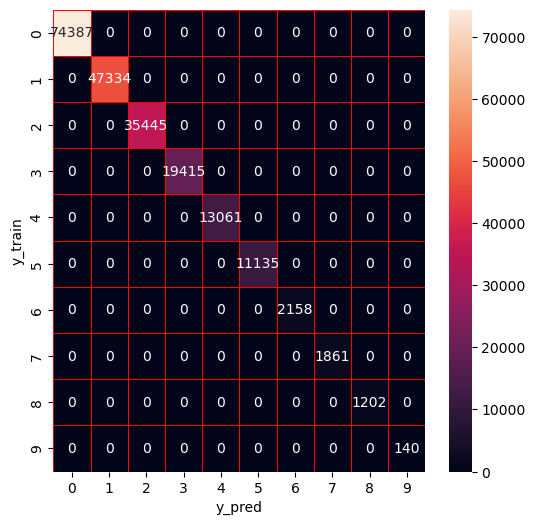

In [29]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,none= precision_recall_fscore_support(y_train, y_pred, average='weighted') 
print('Precision of Voting Classifier: '+(str(precision)))
print('Recall of Voting Classifier: '+(str(recall)))
print('F1-score of Voting Classifier: '+(str(fscore)))
print(classification_report(y_train,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_train")
plt.show()

In [30]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [31]:
print(ACC)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
print(FPR)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


Normal_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0])
Generic_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
Exploits_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
Fuzzers_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
DoS_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
Reconnaissance_tn = np.sum(cm) - (tp[5]+ fp[5] + fn[5])
Analysis_tn = np.sum(cm) - (tp[6]+ fp[6] + fn[6])
Backdoor_tn = np.sum(cm) - (tp[7]+ fp[7] + fn[7])
Shellcode_tn = np.sum(cm) - (tp[8]+ fp[8] + fn[8])
print('True Negative Per Label: ' + str([Normal_tn, Generic_tn, Exploits_tn, Fuzzers_tn, DoS_tn,Reconnaissance_tn,Analysis_tn,Backdoor_tn,Shellcode_tn]))


Normal_fpr = fp[0]/ (fp[0] + Normal_tn)
Generic_fpr = fp[1]/ (fp[1] + Generic_tn)
Exploits_fpr = fp[2]/ (fp[2] + Exploits_tn)
Fuzzers_fpr = fp[3]/ (fp[3] + Fuzzers_tn)
DoS_fpr = fp[4]/ (fp[4] + DoS_tn)
Reconnaissance_fpr = fp[5]/ (fp[5] + Reconnaissance_tn)
Analysis_fpr = fp[6]/ (fp[6] + Analysis_tn)
Backdoor_fpr = fp[7]/ (fp[7] + Backdoor_tn)
Shellcode_fpr = fp[8]/ (fp[8] + Shellcode_tn)
print('False Positive Rate Per Label: '+ str([Normal_fpr, Generic_fpr, Exploits_fpr, Fuzzers_fpr, DoS_fpr,Reconnaissance_fpr,Analysis_fpr,Backdoor_fpr,Shellcode_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([Normal_tn, Generic_tn, Exploits_tn, Fuzzers_tn, DoS_tn,Reconnaissance_tn,Analysis_tn,Backdoor_tn,Shellcode_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [74387 47334 35445 19415 13061 11135  2158  1861  1202   140]
False Positive Per Label: [0 0 0 0 0 0 0 0 0 0]
False Negative Per Label: [0 0 0 0 0 0 0 0 0 0]
True Negative Per Label: [131751, 158804, 170693, 186723, 193077, 195003, 203980, 204277, 204936]
False Positive Rate Per Label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall False Positive Rate = 0.0



# Test

In [34]:
from sklearn.metrics import accuracy_score
for clf in(dt_clf,rnd_clf,xg_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

DecisionTreeClassifier 0.9990491898709615
RandomForestClassifier 0.999437275637916
XGBClassifier 0.9994954885029591
VotingClassifier 0.999437275637916


Precision of Voting Classifier: 0.9993130134376063
Recall of Voting Classifier: 0.999437275637916
F1-score of Voting Classifier: 0.9993118856087982
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18613
           1       1.00      1.00      1.00     11537
           2       1.00      1.00      1.00      9080
           3       1.00      1.00      1.00      4831
           4       1.00      1.00      1.00      3292
           5       1.00      1.00      1.00      2852
           6       1.00      1.00      1.00       519
           7       1.00      1.00      1.00       468
           8       1.00      1.00      1.00       309
           9       0.69      0.26      0.38        34

    accuracy                           1.00     51535
   macro avg       0.97      0.93      0.94     51535
weighted avg       1.00      1.00      1.00     51535



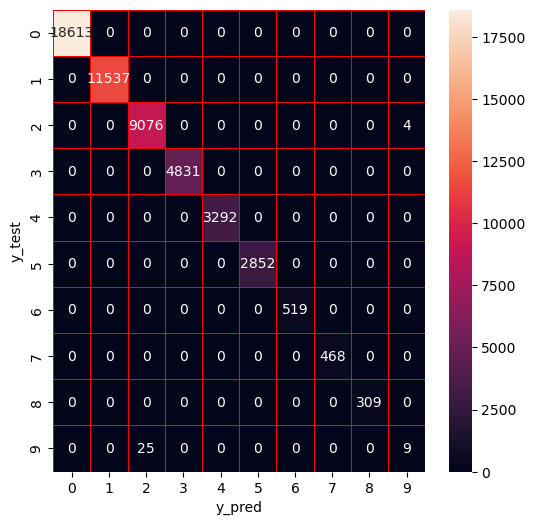

In [35]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of Voting Classifier: '+(str(precision)))
print('Recall of Voting Classifier: '+(str(recall)))
print('F1-score of Voting Classifier: '+(str(fscore)))
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [36]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [37]:
print(ACC)

[1.         1.         0.99943728 1.         1.         1.
 1.         1.         1.         0.99943728]


In [38]:
print(FPR)

[0.00000000e+00 0.00000000e+00 5.88858792e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.76683948e-05]


In [39]:
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


Normal_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0])
Generic_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
Exploits_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
Fuzzers_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
DoS_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
Reconnaissance_tn = np.sum(cm) - (tp[5]+ fp[5] + fn[5])
Analysis_tn = np.sum(cm) - (tp[6]+ fp[6] + fn[6])
Backdoor_tn = np.sum(cm) - (tp[7]+ fp[7] + fn[7])
Shellcode_tn = np.sum(cm) - (tp[8]+ fp[8] + fn[8])
print('True Negative Per Label: ' + str([Normal_tn, Generic_tn, Exploits_tn, Fuzzers_tn, DoS_tn,Reconnaissance_tn,Analysis_tn,Backdoor_tn,Shellcode_tn]))


Normal_fpr = fp[0]/ (fp[0] + Normal_tn)
Generic_fpr = fp[1]/ (fp[1] + Generic_tn)
Exploits_fpr = fp[2]/ (fp[2] + Exploits_tn)
Fuzzers_fpr = fp[3]/ (fp[3] + Fuzzers_tn)
DoS_fpr = fp[4]/ (fp[4] + DoS_tn)
Reconnaissance_fpr = fp[5]/ (fp[5] + Reconnaissance_tn)
Analysis_fpr = fp[6]/ (fp[6] + Analysis_tn)
Backdoor_fpr = fp[7]/ (fp[7] + Backdoor_tn)
Shellcode_fpr = fp[8]/ (fp[8] + Shellcode_tn)
print('False Positive Rate Per Label: '+ str([Normal_fpr, Generic_fpr, Exploits_fpr, Fuzzers_fpr, DoS_fpr,Reconnaissance_fpr,Analysis_fpr,Backdoor_fpr,Shellcode_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([Normal_tn, Generic_tn, Exploits_tn, Fuzzers_tn, DoS_tn,Reconnaissance_tn,Analysis_tn,Backdoor_tn,Shellcode_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [18613 11537  9076  4831  3292  2852   519   468   309     9]
False Positive Per Label: [ 0  0 25  0  0  0  0  0  0  4]
False Negative Per Label: [ 0  0  4  0  0  0  0  0  0 25]
True Negative Per Label: [32922, 39998, 42430, 46704, 48243, 48683, 51016, 51067, 51226]
False Positive Rate Per Label: [0.0, 0.0, 0.0005888587916617595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall False Positive Rate = 7.033406254395879e-05



In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_clf, X, y)
print(scores)
print(np.mean(scores))

[0.99947608 0.99941787 0.99935966 0.9945861  0.99941786]
0.9984515145200682
